In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata = ad.read_h5ad('latent.h5ad')

### Visualization

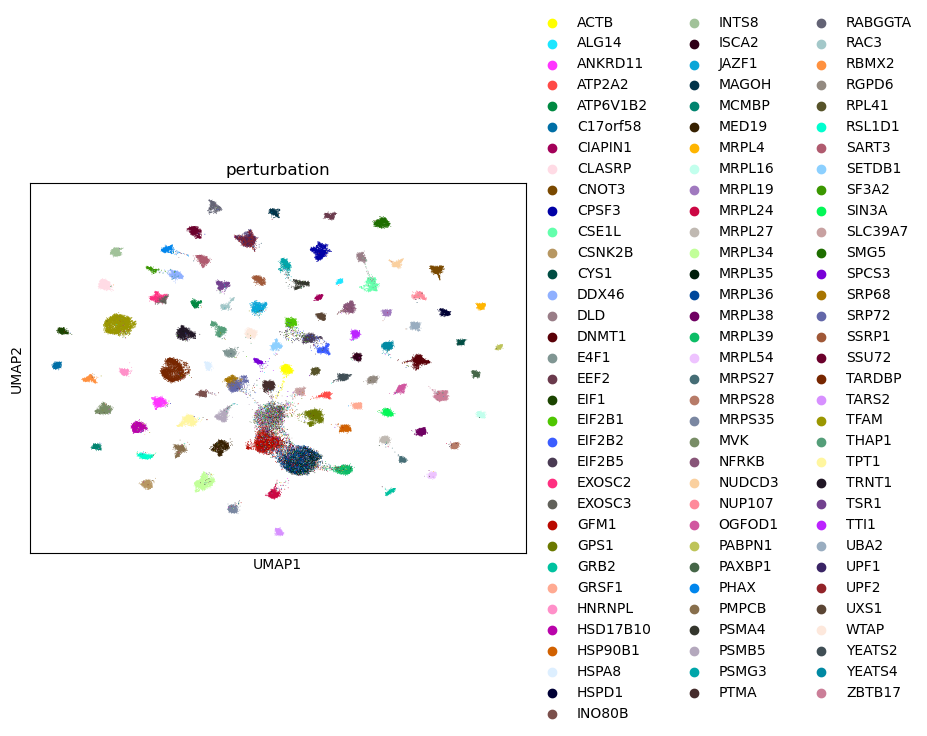

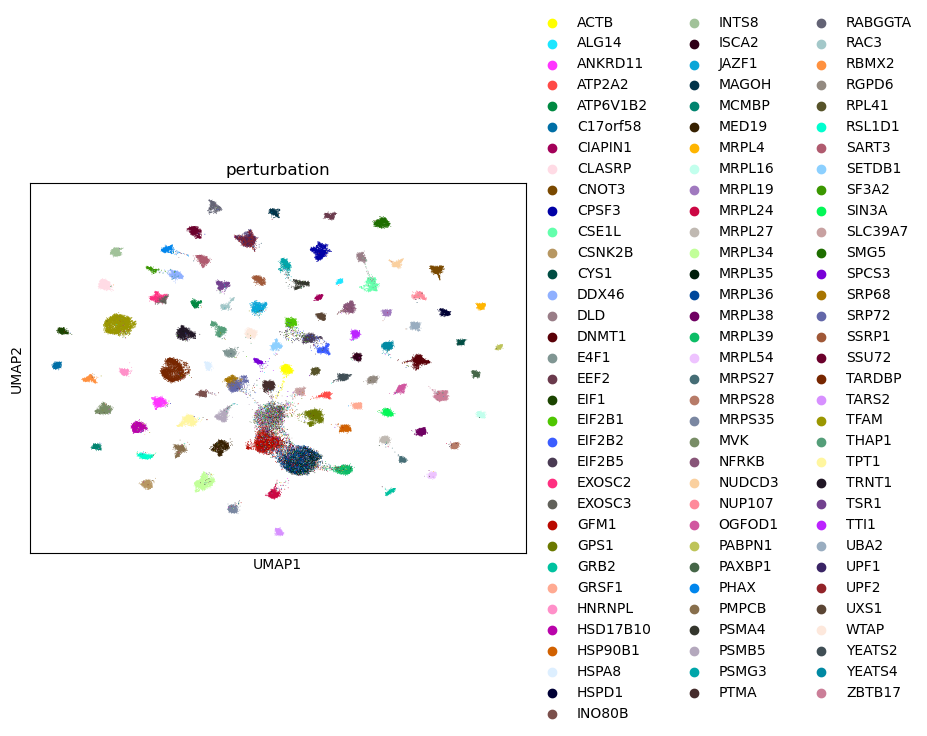

In [4]:
# visualize original data
sc.pp.neighbors(adata, use_rep="X")
sc.tl.umap(adata)

# Save PNG
sc.pl.umap(
    adata, 
    color="perturbation", 
    save="_perturbation.png", 
)

# Save SVG
sc.pl.umap(
    adata, 
    color="perturbation", 
    save="_perturbation.svg"
)

In [ ]:
import plotly.express as px

# UMAP coordinates
umap_df = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
umap_df['perturbation'] = adata.obs['perturbation'].values

# Determine axis limits from Scanpy UMAP (tight bounds)
x_min, x_max = umap_df['UMAP1'].min() - 1, umap_df['UMAP1'].max() + 1
y_min, y_max = umap_df['UMAP2'].min() - 1, umap_df['UMAP2'].max() + 1

# Plot with fixed axis ranges
fig = px.scatter(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    color='perturbation',
    hover_data=['perturbation'],
    title='UMAP of Perturbations'
)

# Update layout for equal scaling
fig.update_layout(
    xaxis=dict(range=[x_min, x_max], scaleanchor="y", scaleratio=1),
    yaxis=dict(range=[y_min, y_max])
)
fig.write_html('ExPert_latent_umap_original_perturbation.html')
fig.show()

### Data pre-processing

In [ ]:
print(adata.obs.columns)

In [ ]:
print(adata.obs['celltype'].unique())

In [ ]:
print(adata.obs['celltype_broad'].unique())

In [ ]:
print(adata.obs['perturbation'].unique())

In [ ]:
adata.uns